In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dataset = 'Spotify_Youtube.csv'
df=pd.read_csv(dataset)


In [16]:
df.shape

(20718, 28)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [18]:
df = df.drop(df.columns[0], axis=1)

In [19]:
#replacing missing values if any for numerical columns
for col in df.select_dtypes(include=['float64']):
   df[col].fillna(df[col].mean(), inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20718 non-null  float64
 7   Energy            20718 non-null  float64
 8   Key               20718 non-null  float64
 9   Loudness          20718 non-null  float64
 10  Speechiness       20718 non-null  float64
 11  Acousticness      20718 non-null  float64
 12  Instrumentalness  20718 non-null  float64
 13  Liveness          20718 non-null  float64
 14  Valence           20718 non-null  float64
 15  Tempo             20718 non-null  float64
 16  Duration_ms       20718 non-null  float6

<ipython-input-19-f26cbccaf9f3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [20]:
#replacing missing values if any for categorical columns

for col in df.select_dtypes(include=['object']):
   df[col].fillna("Unknown", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20718 non-null  float64
 7   Energy            20718 non-null  float64
 8   Key               20718 non-null  float64
 9   Loudness          20718 non-null  float64
 10  Speechiness       20718 non-null  float64
 11  Acousticness      20718 non-null  float64
 12  Instrumentalness  20718 non-null  float64
 13  Liveness          20718 non-null  float64
 14  Valence           20718 non-null  float64
 15  Tempo             20718 non-null  float64
 16  Duration_ms       20718 non-null  float6

<ipython-input-20-e572b7b3da2d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [21]:
# deleting if any duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")
df = df.drop_duplicates().reset_index(drop=True)


Duplicate Rows: 0


In [22]:
#GETTING THE COUNT OF OUTLIERS IN EACH COLUMN
from collections import Counter

def identify_outliers_iqr(data):
    outliers = {}

    for column in data.columns:
        if data[column].dtype in ['float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers
            outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
            outlier_indices = data[column][outlier_mask].index.tolist()

            outliers[column] = outlier_indices

            print(f"{column}: {len(outlier_indices)} outliers")


    return outliers

outliers_dict = identify_outliers_iqr(df)


Danceability: 267 outliers
Energy: 364 outliers
Key: 0 outliers
Loudness: 1294 outliers
Speechiness: 2646 outliers
Acousticness: 0 outliers
Instrumentalness: 4441 outliers
Liveness: 1501 outliers
Valence: 0 outliers
Tempo: 64 outliers
Duration_ms: 795 outliers
Views: 2386 outliers
Likes: 2306 outliers
Comments: 2347 outliers
Stream: 2279 outliers


In [23]:
# REMOVING ENTRIES WHICH ARE OUTLIERS IN MORE THAN 3 FEATURES
from collections import Counter

outlier_counts = Counter()
for indices in outliers_dict.values():
    outlier_counts.update(indices)

threshold = 3

entries_to_remove = [index for index, count in outlier_counts.items() if count > threshold]

#removing those entries
df_cleaned = df.drop(index=entries_to_remove)

df_cleaned.reset_index(drop=True, inplace=True)

print(f"Removed {len(entries_to_remove)} entries that were outliers in more than {threshold} features.")
print(df_cleaned.info())


Removed 1536 entries that were outliers in more than 3 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19182 entries, 0 to 19181
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19182 non-null  object 
 1   Url_spotify       19182 non-null  object 
 2   Track             19182 non-null  object 
 3   Album             19182 non-null  object 
 4   Album_type        19182 non-null  object 
 5   Uri               19182 non-null  object 
 6   Danceability      19182 non-null  float64
 7   Energy            19182 non-null  float64
 8   Key               19182 non-null  float64
 9   Loudness          19182 non-null  float64
 10  Speechiness       19182 non-null  float64
 11  Acousticness      19182 non-null  float64
 12  Instrumentalness  19182 non-null  float64
 13  Liveness          19182 non-null  float64
 14  Valence           19182 non-null  float64
 15  Tempo             1918

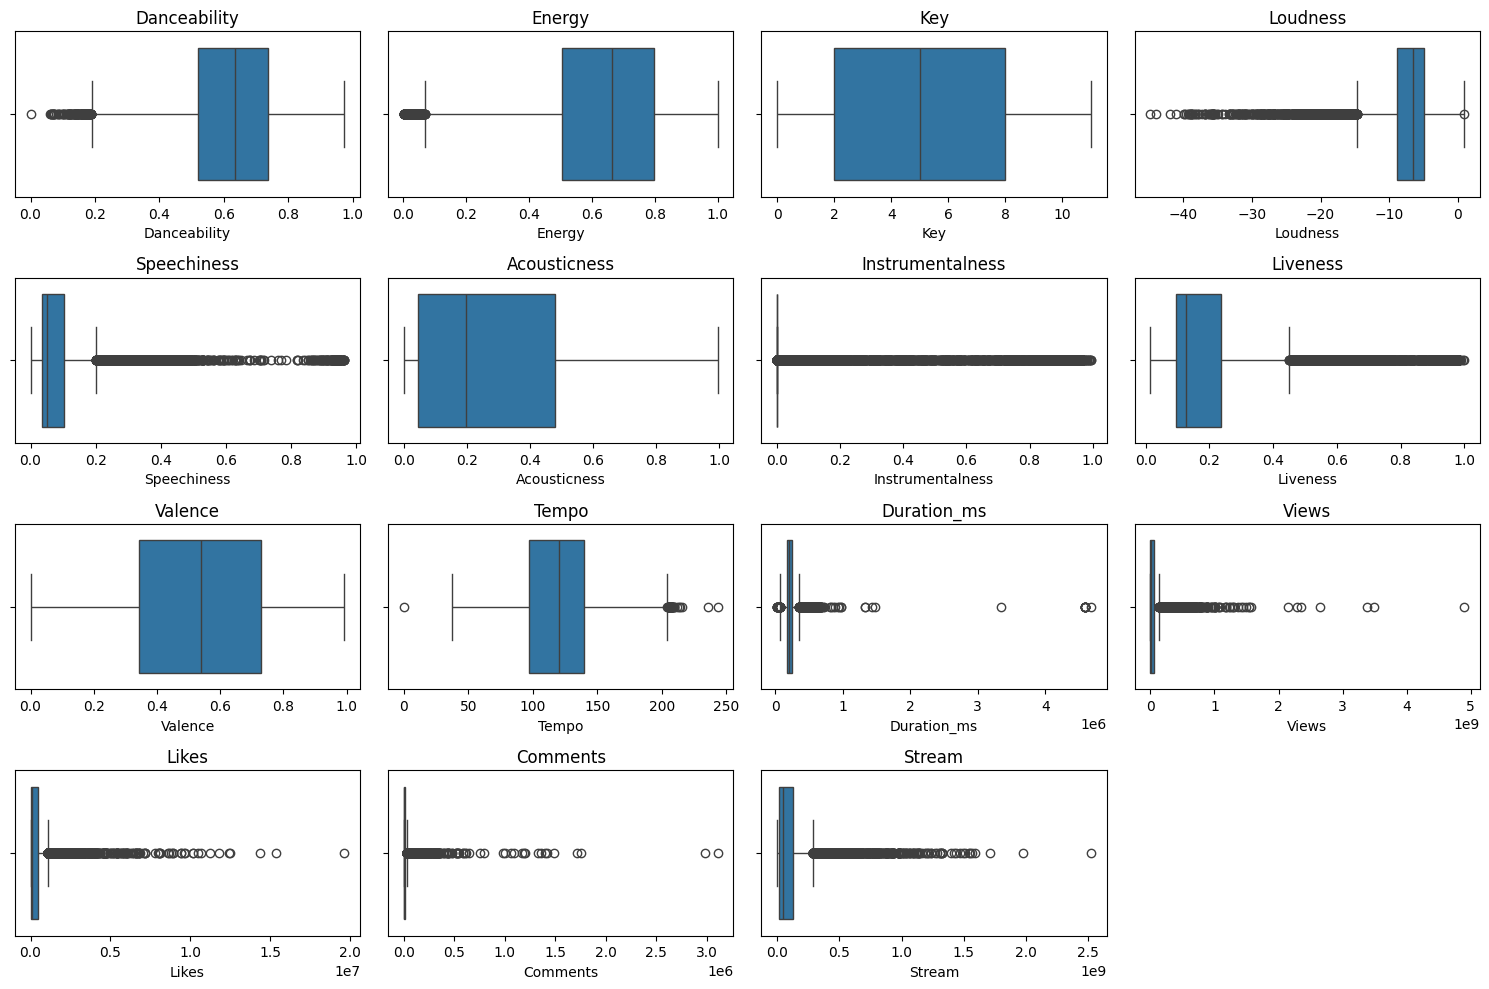

In [24]:
#box plot to check for outliers
numeric_df = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=numeric_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [25]:
#can observe from box plot that even after iqr method, still many outliers in some cols
print(numeric_df.skew())


Danceability        -0.436154
Energy              -0.652810
Key                 -0.010730
Loudness            -2.552644
Speechiness          3.462590
Acousticness         0.855201
Instrumentalness     3.889551
Liveness             2.328759
Valence             -0.087404
Tempo                0.446064
Duration_ms         24.151115
Views               11.750520
Likes                6.876300
Comments            26.702373
Stream               3.904823
dtype: float64


In [26]:
#removing skewness

from sklearn.preprocessing import PowerTransformer

numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Log transformation
log_cols = ["Views", "Likes", "Comments", "Stream", "Duration_ms"]
df_cleaned[log_cols] = df_cleaned[log_cols].apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Power transformation
pt = PowerTransformer(method="yeo-johnson")  # Works for both positive & negative values
df_cleaned[numeric_cols] = pt.fit_transform(df_cleaned[numeric_cols])

print(df_cleaned[numeric_cols].skew())
print(df_cleaned.info())

Danceability       -0.044588
Energy             -0.102278
Key                -0.244572
Loudness            0.056543
Speechiness         0.677765
Acousticness        0.196344
Instrumentalness    2.400317
Liveness            0.350169
Valence            -0.058090
Tempo               0.014273
Duration_ms        -0.004045
Views              -0.152618
Likes              -0.169457
Comments           -0.241610
Stream             -0.013602
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19182 entries, 0 to 19181
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19182 non-null  object 
 1   Url_spotify       19182 non-null  object 
 2   Track             19182 non-null  object 
 3   Album             19182 non-null  object 
 4   Album_type        19182 non-null  object 
 5   Uri               19182 non-null  object 
 6   Danceability      19182 non-null  float64
 7   Energy       

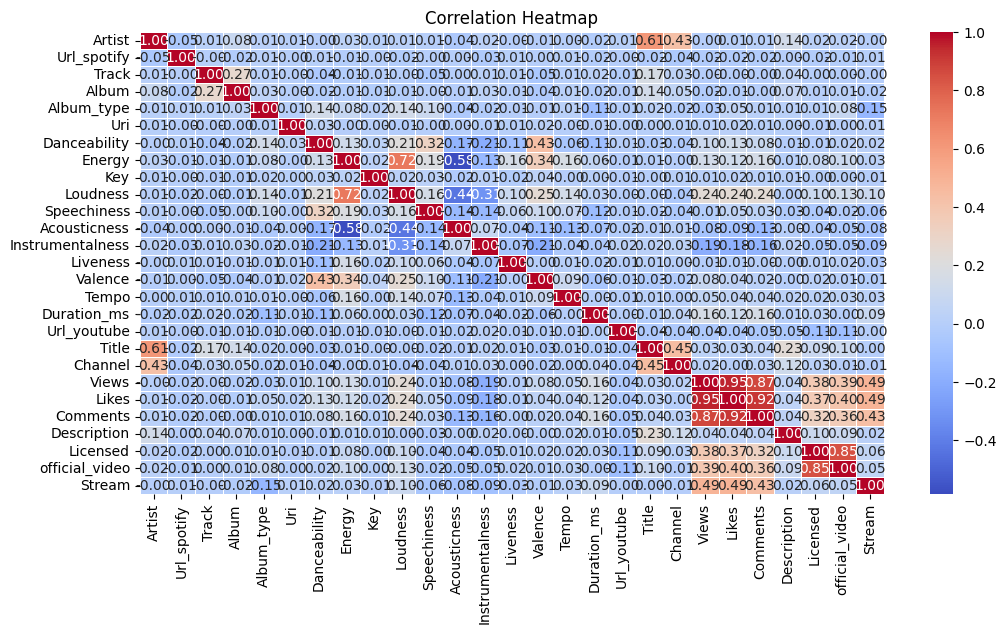

In [27]:
#correlation heatmap to check correation between features

from sklearn.preprocessing import LabelEncoder

df_corr = df_cleaned.copy()

# Label Encoding for categorical features
cat_cols = df_corr.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df_corr[col] = encoder.fit_transform(df_corr[col].astype(str))

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [28]:
#checking identical columns with the threshold of 0.85, if there are any pairs above 0.85, we can remove one of them

numeric_df = df_cleaned.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().abs()
corr2 = corr_matrix[corr_matrix > 0.85]
print(corr2)

#observation: no pair had more than 0.85, so we will not remove any

                  Danceability  Energy  Key  Loudness  Speechiness  \
Danceability               1.0     NaN  NaN       NaN          NaN   
Energy                     NaN     1.0  NaN       NaN          NaN   
Key                        NaN     NaN  1.0       NaN          NaN   
Loudness                   NaN     NaN  NaN       1.0          NaN   
Speechiness                NaN     NaN  NaN       NaN          1.0   
Acousticness               NaN     NaN  NaN       NaN          NaN   
Instrumentalness           NaN     NaN  NaN       NaN          NaN   
Liveness                   NaN     NaN  NaN       NaN          NaN   
Valence                    NaN     NaN  NaN       NaN          NaN   
Tempo                      NaN     NaN  NaN       NaN          NaN   
Duration_ms                NaN     NaN  NaN       NaN          NaN   
Views                      NaN     NaN  NaN       NaN          NaN   
Likes                      NaN     NaN  NaN       NaN          NaN   
Comments            

In [29]:

df_cleaned.to_csv("preprocessed_Spotify_dataset.csv", index=False)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19182 entries, 0 to 19181
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19182 non-null  object 
 1   Url_spotify       19182 non-null  object 
 2   Track             19182 non-null  object 
 3   Album             19182 non-null  object 
 4   Album_type        19182 non-null  object 
 5   Uri               19182 non-null  object 
 6   Danceability      19182 non-null  float64
 7   Energy            19182 non-null  float64
 8   Key               19182 non-null  float64
 9   Loudness          19182 non-null  float64
 10  Speechiness       19182 non-null  float64
 11  Acousticness      19182 non-null  float64
 12  Instrumentalness  19182 non-null  float64
 13  Liveness          19182 non-null  float64
 14  Valence           19182 non-null  float64
 15  Tempo             19182 non-null  float64
 16  Duration_ms       19182 non-null  float6

In [30]:

dataset = 'preprocessed_Spotify_dataset.csv'
df2=pd.read_csv(dataset)


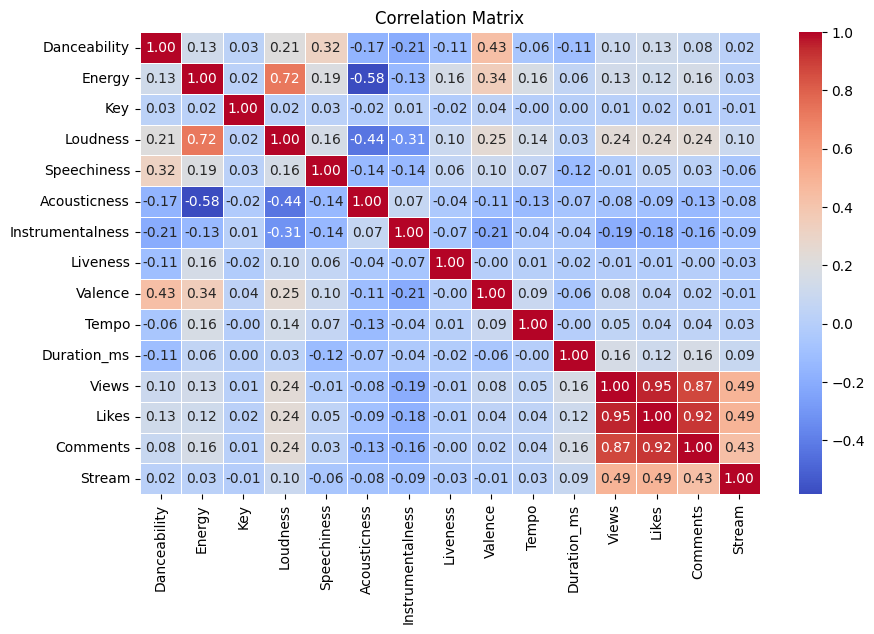

Top Correlated Features with Views:
 Likes               0.952086
Comments            0.873443
Stream              0.490735
Loudness            0.235865
Instrumentalness    0.194716
Duration_ms         0.163959
Energy              0.134995
Danceability        0.104745
Valence             0.081074
Acousticness        0.080699
Tempo               0.047647
Key                 0.014141
Speechiness         0.013387
Liveness            0.007190
Name: Views, dtype: float64
R² = 0.9230, RMSE = 0.2765


<ipython-input-31-59a30d0e7b88>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette='viridis')


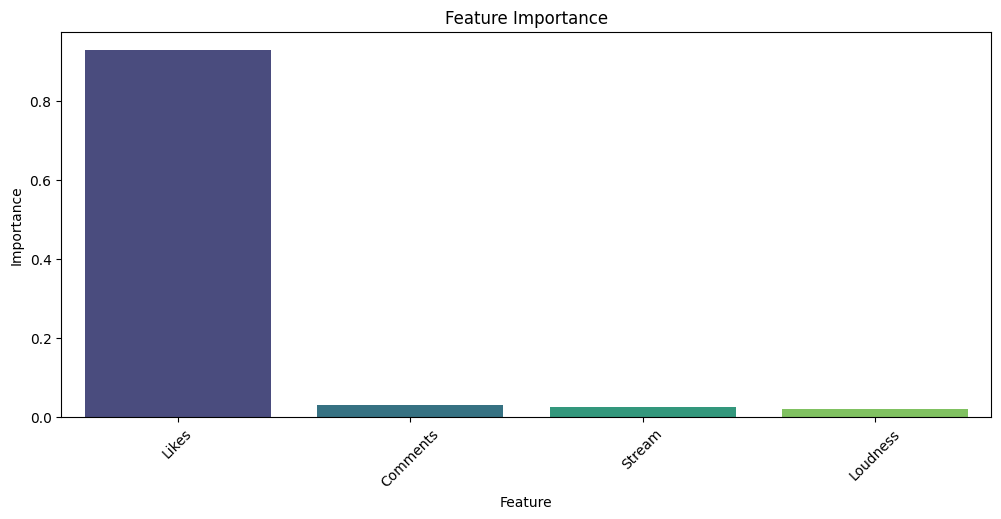

Final Selected Features: ['Loudness', 'Comments', 'Stream', 'Instrumentalness', 'Likes']


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


numeric_cols = df2.select_dtypes(include=['number']).columns

#  correlation matrix
correlation_matrix = df2[numeric_cols].corr()

corr_with_views = correlation_matrix['Views'].drop('Views').abs().sort_values(ascending=False)

# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

print("Top Correlated Features with Views:\n", corr_with_views)


selected_features = corr_with_views[corr_with_views > 0.2].index.tolist()
X = df2[selected_features]
y = df2['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² = {r2:.4f}, RMSE = {rmse:.4f}")

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

#Feature Importance
plt.figure(figsize=(12, 5))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

final_features = list(set(corr_with_views.index[:5]) | set(feature_importance['Feature'][:5]))
print("Final Selected Features:", final_features)


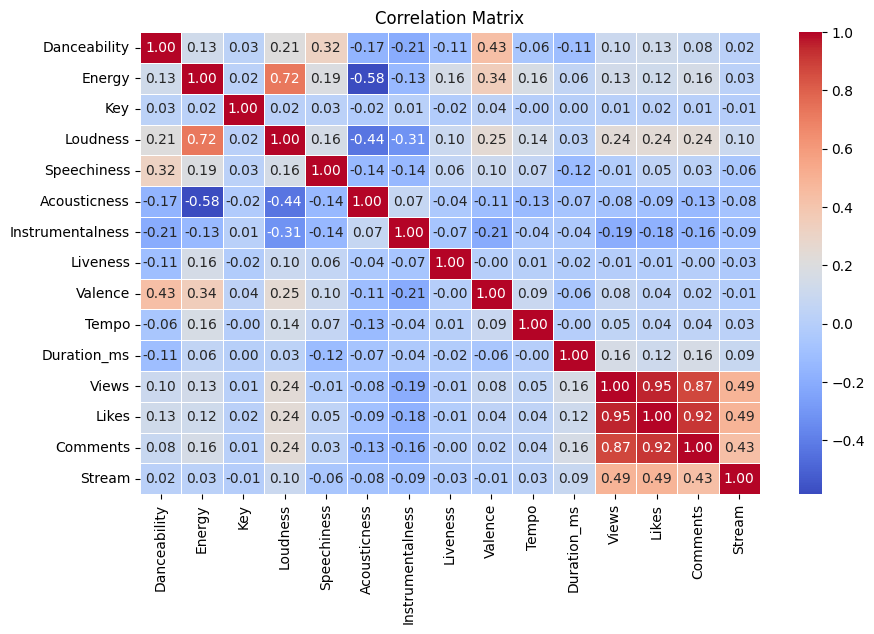

Top Correlated Features with Views:
 Likes               0.952086
Comments            0.873443
Stream              0.490735
Loudness            0.235865
Instrumentalness    0.194716
Duration_ms         0.163959
Energy              0.134995
Danceability        0.104745
Valence             0.081074
Acousticness        0.080699
Tempo               0.047647
Key                 0.014141
Speechiness         0.013387
Liveness            0.007190
Name: Views, dtype: float64

 R² = 0.7997, RMSE = 0.4461
Final Selected Features: ['Comments', 'Loudness', 'Stream', 'Instrumentalness']


<ipython-input-32-b52f6004c7c3>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette='viridis')


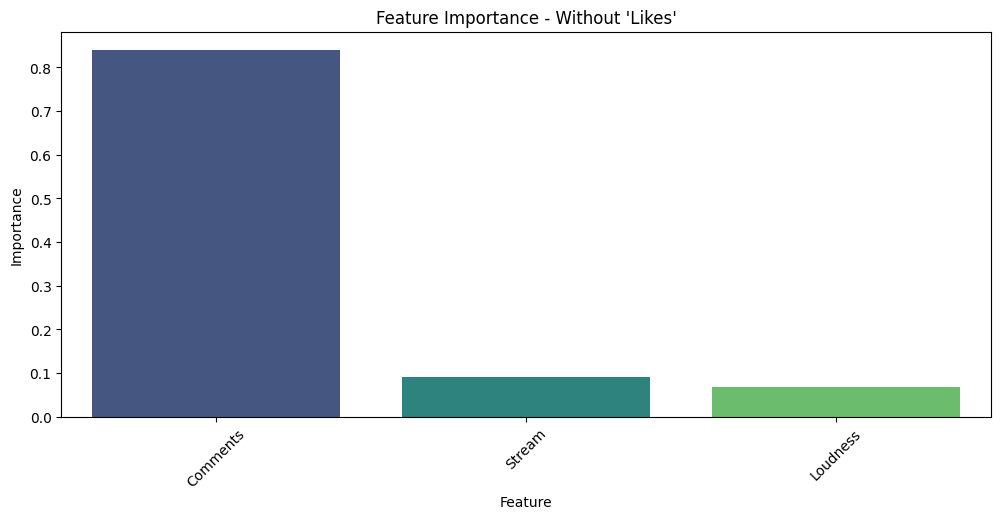

In [32]:
# without likes column, but it results in more error so we will not take it

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


if 'df2' not in globals():
    raise ValueError("df2 is not defined. Ensure the dataset is loaded before running the script.")

numeric_cols = df2.select_dtypes(include=['number']).columns

correlation_matrix = df2[numeric_cols].corr()

correlation_with_views = correlation_matrix['Views'].drop('Views').abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

print("Top Correlated Features with Views:\n", correlation_with_views)

features = correlation_with_views[correlation_with_views > 0.2].index.tolist()
features = [feature for feature in features if feature != 'Likes']

X = df2[features]
y = df2['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n R² = {r2:.4f}, RMSE = {rmse:.4f}")

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

final_features = list(set(correlation_with_views.index[:5]) | set(feature_importance['Feature'][:5]))

final_features = [feature for feature in final_features if feature != 'Likes']

print("Final Selected Features:", final_features)

plt.figure(figsize=(12, 5))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['Importance'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Feature Importance - Without 'Likes'")
plt.show()


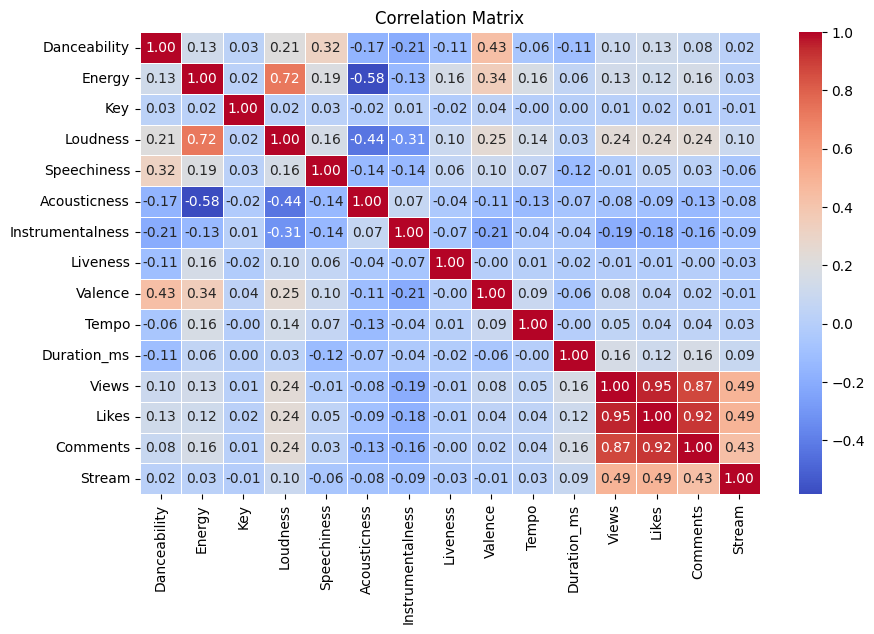


 Likes               0.952086
Comments            0.873443
Stream              0.490735
Loudness            0.235865
Instrumentalness    0.194716
Duration_ms         0.163959
Energy              0.134995
Danceability        0.104745
Valence             0.081074
Acousticness        0.080699
Tempo               0.047647
Key                 0.014141
Speechiness         0.013387
Liveness            0.007190
Name: Views, dtype: float64
 R² = 0.9230
 RMSE = 0.2766
 MAE = 0.2091


<ipython-input-33-d401db0601d9>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_xgb['Feature'], y=feature_importance_xgb['Importance'], palette='viridis')


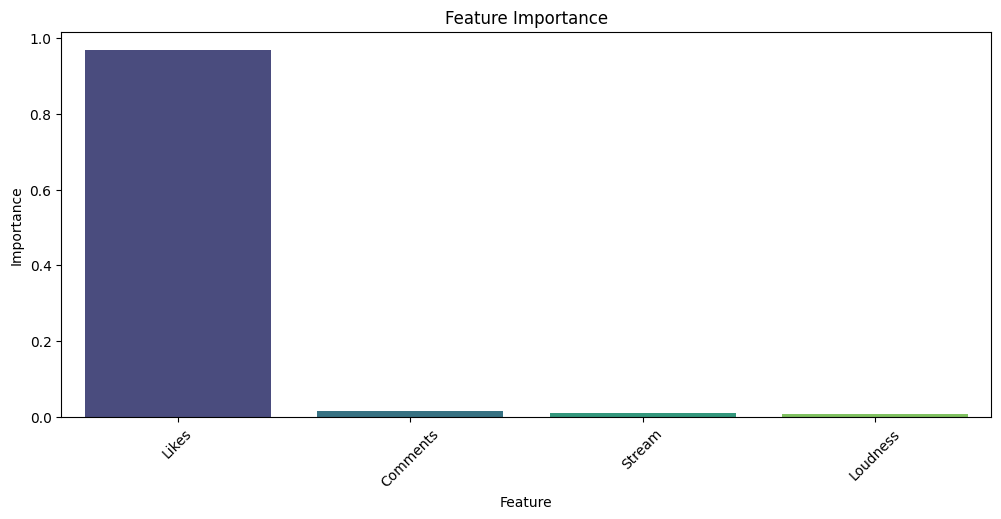

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


numeric_cols = df2.select_dtypes(include=['number']).columns

correlation_matrix = df2[numeric_cols].corr()

correlation_with_views = correlation_matrix['Views'].drop('Views').abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

print("\n", correlation_with_views)

selected_features = correlation_with_views[correlation_with_views > 0.2].index.tolist()
X = df2[selected_features]
y = df2['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f" R² = {r2_xgb:.4f}")
print(f" RMSE = {rmse_xgb:.4f}")
print(f" MAE = {mae_xgb:.4f}")

feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=feature_importance_xgb['Feature'], y=feature_importance_xgb['Importance'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()



In [34]:
# IMPACT OF CATEGORICAL VALUES ON 'VIEWS' USING AGGREGATION

artist_avg_views = df2.groupby('Artist')['Views'].mean()
album_avg_views = df2.groupby('Album')['Views'].mean()
channel_avg_views = df2.groupby('Channel')['Views'].mean()
album_type_avg_views = df2.groupby('Album_type')['Views'].mean()
licensed_avg_views = df2.groupby('Licensed')['Views'].mean()
official_video_avg_views = df2.groupby('official_video')['Views'].mean()
track_avg_views = df2.groupby('Track')['Views'].mean()
title_avg_views = df2.groupby('Title')['Views'].mean()

artist_min, artist_max = artist_avg_views.min(), artist_avg_views.max()
album_min, album_max = album_avg_views.min(), album_avg_views.max()
channel_min, channel_max = channel_avg_views.min(), channel_avg_views.max()
album_type_min, album_type_max = album_type_avg_views.min(), album_type_avg_views.max()
licensed_min, licensed_max = licensed_avg_views.min(), licensed_avg_views.max()
official_video_min, official_video_max = official_video_avg_views.min(), official_video_avg_views.max()
track_min, track_max = track_avg_views.min(), track_avg_views.max()
title_min, title_max = title_avg_views.min(), title_avg_views.max()

# Computing range
artist_range = artist_max - artist_min
album_range = album_max - album_min
channel_range = channel_max - channel_min
album_type_range = album_type_max - album_type_min
licensed_range = licensed_max - licensed_min
official_video_range = official_video_max - official_video_min
track_range = track_max - track_min
title_range = title_max - title_min

print(f" Artist : Min = {artist_min:.2f}, Max = {artist_max:.2f}, Range = {artist_range:.2f}")
print(f" Album : Min = {album_min:.2f}, Max = {album_max:.2f}, Range = {album_range:.2f}")
print(f" Channel : Min = {channel_min:.2f}, Max = {channel_max:.2f}, Range = {channel_range:.2f}")
print(f" Album Type : Min = {album_type_min:.2f}, Max = {album_type_max:.2f}, Range = {album_type_range:.2f}")
print(f" Licensed : Min = {licensed_min:.2f}, Max = {licensed_max:.2f}, Range = {licensed_range:.2f}")
print(f" Official Video : Min = {official_video_min:.2f}, Max = {official_video_max:.2f}, Range = {official_video_range:.2f}")
print(f" Track : Min = {track_min:.2f}, Max = {track_max:.2f}, Range = {track_range:.2f}")
print(f" Title : Min = {title_min:.2f}, Max = {title_max:.2f}, Range = {title_range:.2f}")

#  Artist, Album,Track,Title and Channel have a strong impact on Views (Large Range > 4).
#  Album Type has almost no impact on Views (Range = very small).
#  Licensed & Official Video have moderate impact (Range = ~1.5 - 1.7).


 Artist : Min = -2.21, Max = 2.53, Range = 4.74
 Album : Min = -2.47, Max = 3.42, Range = 5.89
 Channel : Min = -2.51, Max = 2.77, Range = 5.28
 Album Type : Min = -0.10, Max = 0.02, Range = 0.13
 Licensed : Min = -0.53, Max = 1.05, Range = 1.58
 Official Video : Min = -0.67, Max = 1.05, Range = 1.73
 Track : Min = -2.51, Max = 3.71, Range = 6.22
 Title : Min = -2.51, Max = 3.71, Range = 6.22


<ipython-input-35-9dd60dfbec43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")


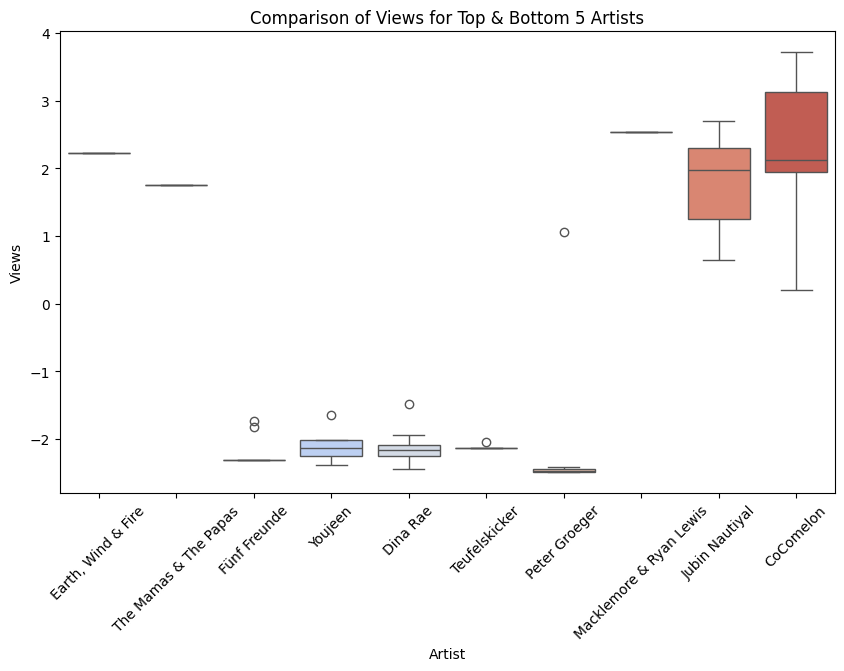

<ipython-input-35-9dd60dfbec43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")


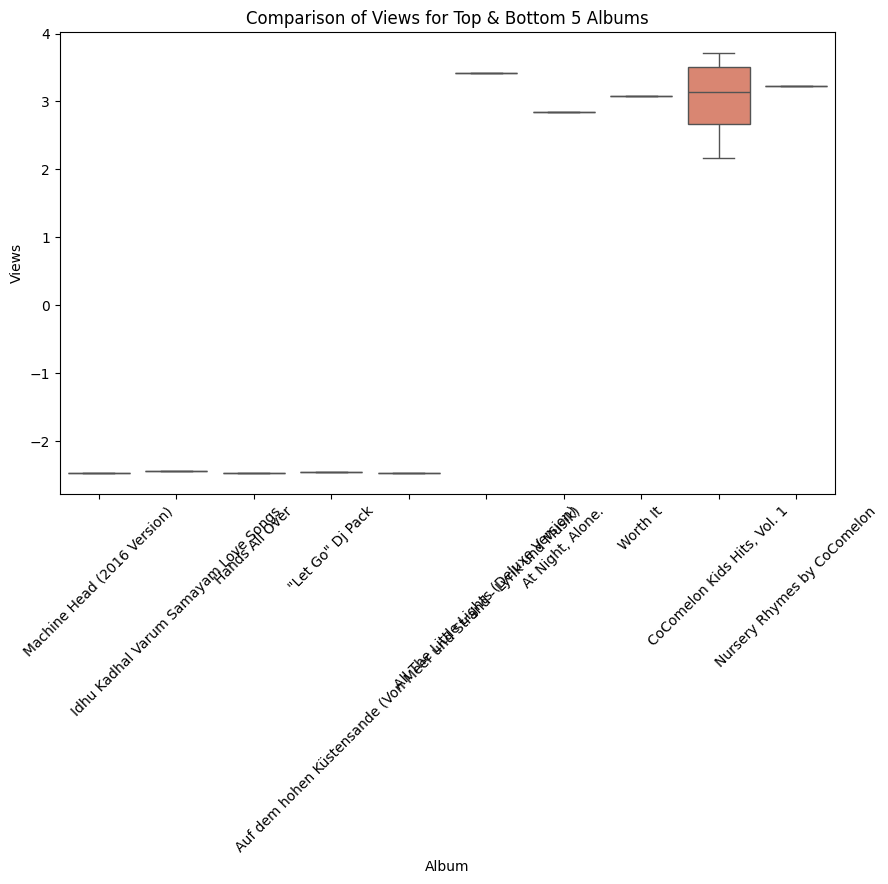

<ipython-input-35-9dd60dfbec43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")


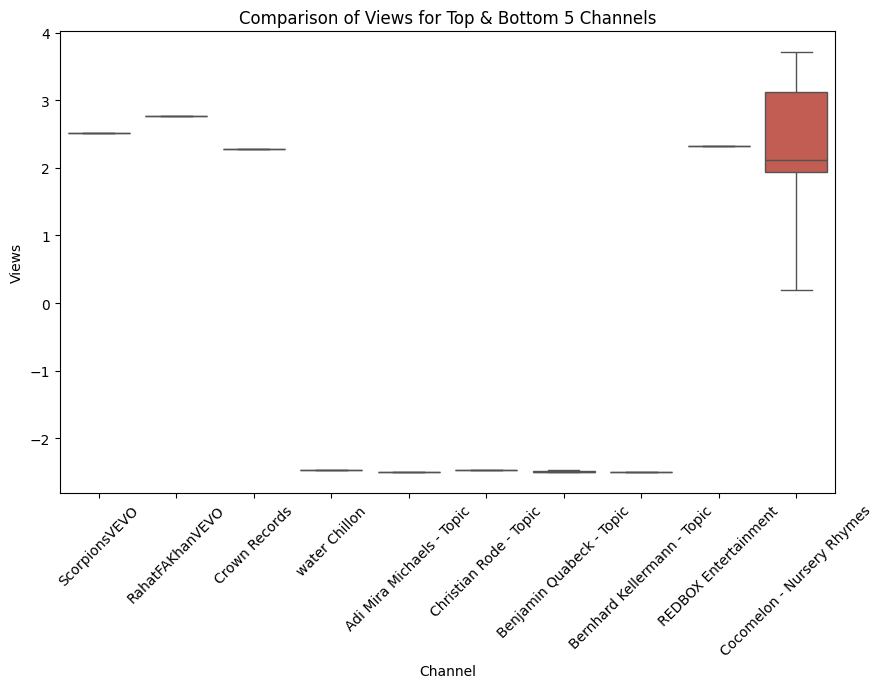

<ipython-input-35-9dd60dfbec43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")


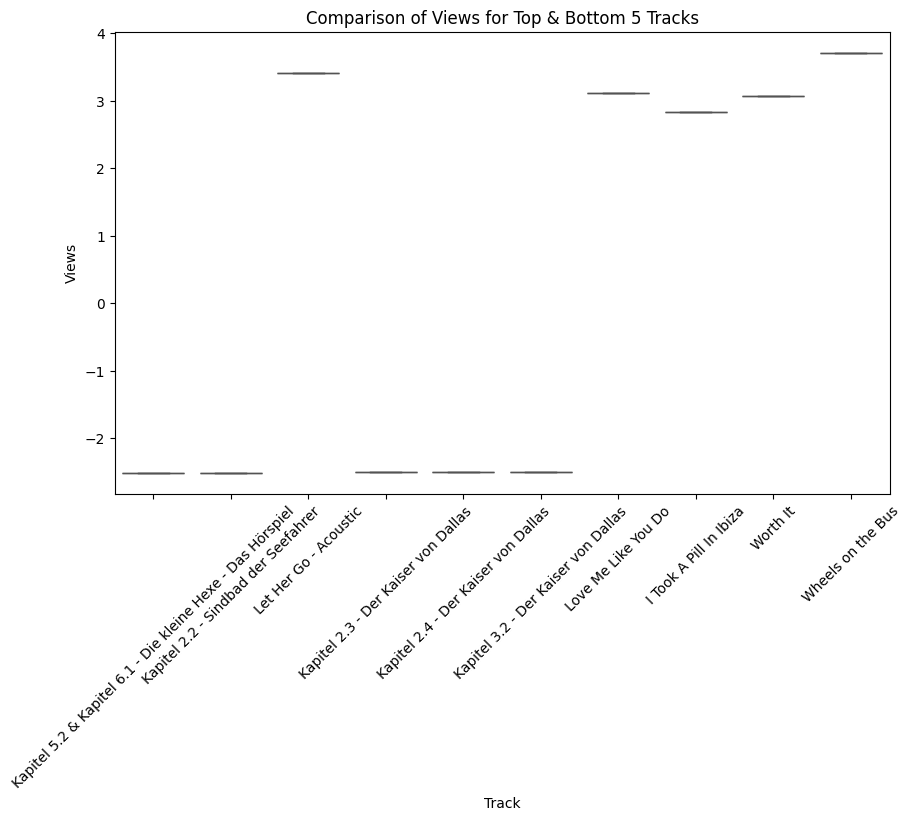

<ipython-input-35-9dd60dfbec43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")


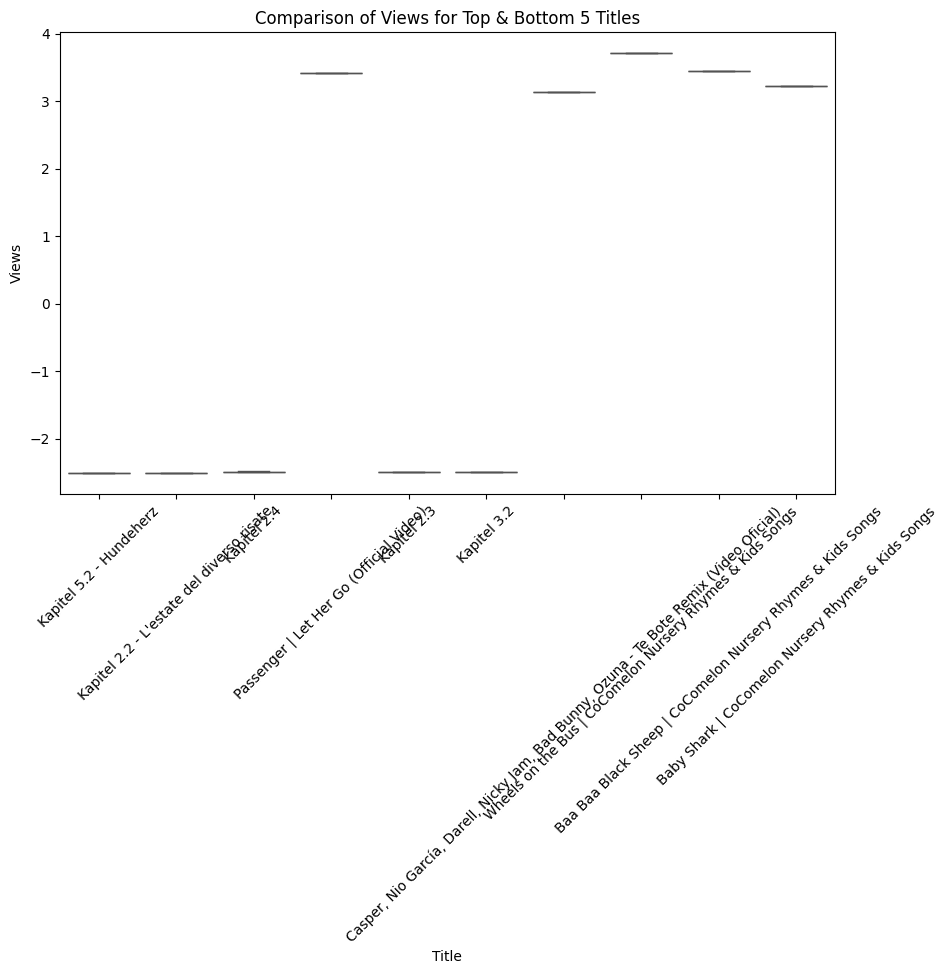

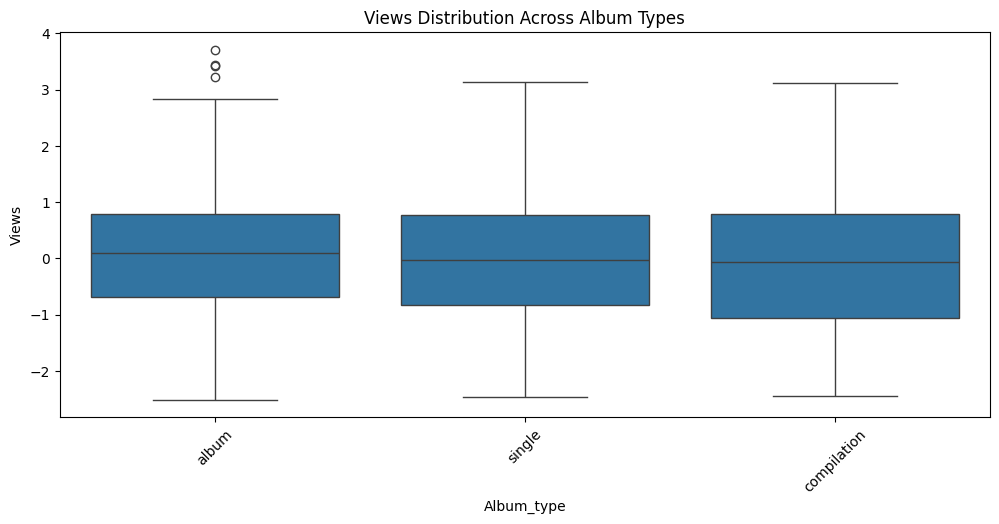

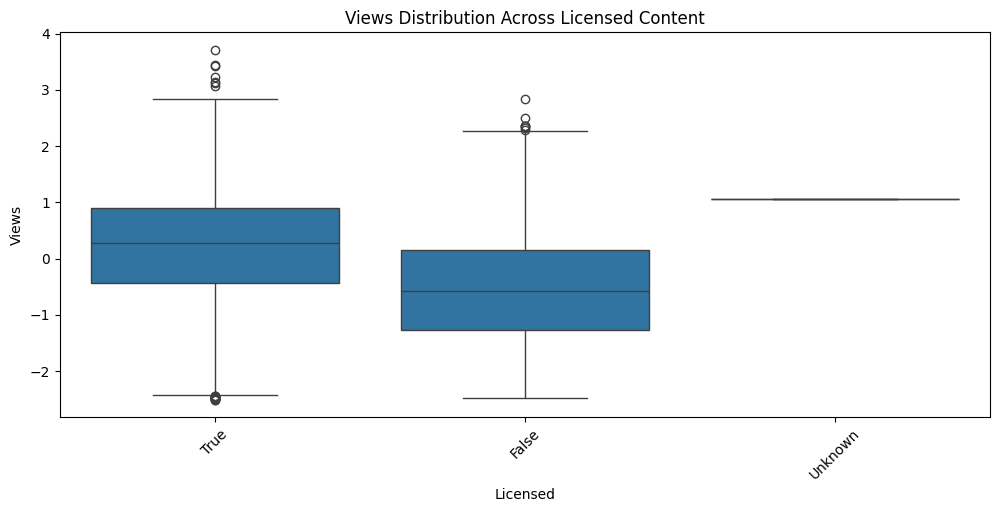

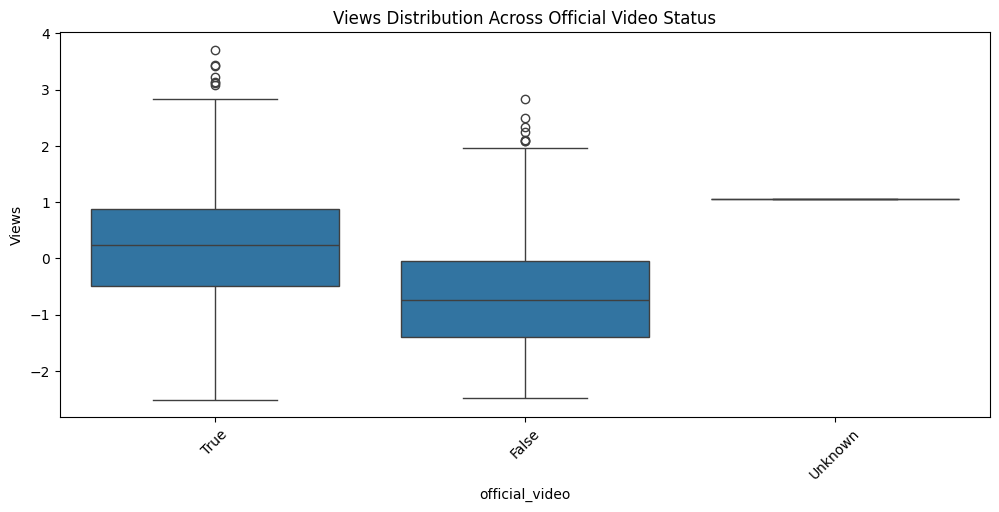

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def rem_chars(text):
    if isinstance(text, str):
        return text.replace('$', 'S').strip()
    return text

columns_to_clean = ["Artist", "Album", "Channel", "Track", "Title"]
for col in columns_to_clean:
    df2[col] = df2[col].apply(rem_chars)

# using top 5 and bottom 5 classes of features based on mean views
def func(df, category):
    mean_views = df.groupby(category)["Views"].mean()

    top_5 = mean_views.nlargest(5).index
    bottom_5 = mean_views.nsmallest(5).index

    output_data = df[df[category].isin(top_5.union(bottom_5))]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category, y="Views", data=output_data, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Comparison of Views for Top & Bottom 5 {category}s")
    plt.xlabel(category)
    plt.ylabel("Views")
    plt.show()

for feature in columns_to_clean:
    func(df2, feature)


plt.figure(figsize=(12, 5))
sns.boxplot(x=df2['Album_type'], y=df2['Views'])
plt.title("Views Distribution Across Album Types")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df2['Licensed'], y=df2['Views'])
plt.title("Views Distribution Across Licensed Content")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df2['official_video'], y=df2['Views'])
plt.title("Views Distribution Across Official Video Status")
plt.xticks(rotation=45)
plt.show()

# we did for top 5 and lowest 5 classes in a feature with too many unique values, difference in box plot shows how much they impact views
# while for last three, there is not much difference, so they do not really affect views
